In [487]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Read data

In [488]:
df = pd.read_csv("/content/Indian Liver Patient Dataset (ILPD).csv", names=['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkphos',
                                                                            'Sgpt', 'Sgot', 'Total_Proteins', 'Albumin', 'A/G_Ratio', 'Class'])

In [489]:
df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkphos,Sgpt,Sgot,Total_Proteins,Albumin,A/G_Ratio,Class
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [490]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               583 non-null    int64  
 1   Gender            583 non-null    object 
 2   Total_Bilirubin   583 non-null    float64
 3   Direct_Bilirubin  583 non-null    float64
 4   Alkphos           583 non-null    int64  
 5   Sgpt              583 non-null    int64  
 6   Sgot              583 non-null    int64  
 7   Total_Proteins    583 non-null    float64
 8   Albumin           583 non-null    float64
 9   A/G_Ratio         579 non-null    float64
 10  Class             583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [491]:
df.isnull().sum()

,0
Age,0
Gender,0
Total_Bilirubin,0
Direct_Bilirubin,0
Alkphos,0
Sgpt,0
Sgot,0
Total_Proteins,0
Albumin,0
A/G_Ratio,4


In [492]:
df['Class'].value_counts()

,count
Class,
1,416
2,167


# Clean data




In [493]:
# Género a 0 y 1 para trabajar solo con datos numéricos aunque sean categóricos
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

In [494]:
# Mapea clase a 1(paciente hepático) y 0(paciente sano)
df['Class'] = df['Class'].map({1: 1, 2: 0})

In [495]:
# Rellenar los nan de 'A/G_Ratio' con la media
df['A/G_Ratio'].fillna(df['A/G_Ratio'].mean(), inplace=True)

<ipython-input-495-581808054246>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['A/G_Ratio'].fillna(df['A/G_Ratio'].mean(), inplace=True)


In [496]:
# La relación SGOT/SGPT (también conocida como AST/ALT) es un indicador clínicamente relevante
df['Sgot_Sgpt_Ratio'] = df['Sgot'] / df['Sgpt']

# Manejar divisiones por cero (si Sgpt = 0)
df['Sgot_Sgpt_Ratio'] = df['Sgot_Sgpt_Ratio'].replace([np.inf, -np.inf], np.nan).fillna(0)

                 Sgot_Sgpt_Ratio    Class
Sgot_Sgpt_Ratio          1.00000  0.07868
Class                    0.07868  1.00000


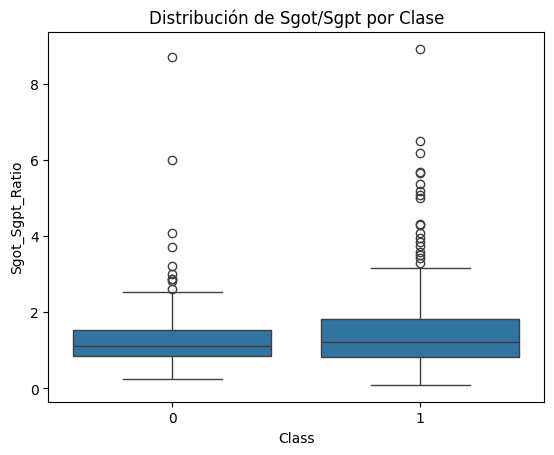

In [497]:
# Correlación
corr = df[['Sgot_Sgpt_Ratio', 'Class']].corr()
print(corr)

sns.boxplot(x='Class', y='Sgot_Sgpt_Ratio', data=df)
plt.title('Distribución de Sgot/Sgpt por Clase')
plt.show()

In [498]:
df.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkphos,Sgpt,Sgot,Total_Proteins,Albumin,A/G_Ratio,Class,Sgot_Sgpt_Ratio
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
mean,44.746141,0.756432,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,0.713551,1.437343
std,16.189833,0.429603,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.318492,0.452490,0.977094
min,4.000000,0.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,0.000000,0.089947
25%,33.000000,1.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,0.000000,0.840000
50%,45.000000,1.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.947064,1.000000,1.173913
75%,58.000000,1.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,1.000000,1.721970
max,90.000000,1.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,1.000000,8.923077


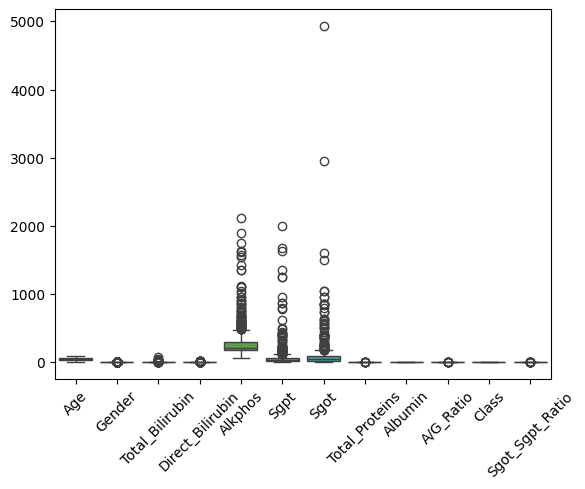

In [499]:
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.show()

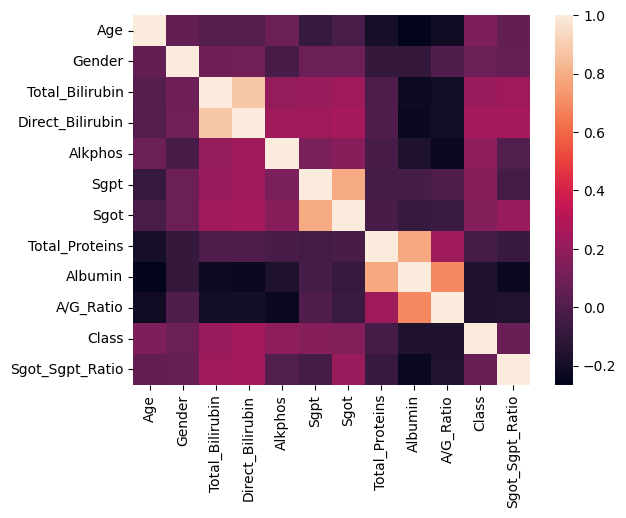

In [500]:
sns.heatmap(df.corr())
plt.show()

# Split data

In [501]:
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, validation_curve, GridSearchCV

In [502]:
#x = df.drop(['Class', 'Direct_Bilirubin','Age', 'Sgpt', 'Sgot'], axis=1)
x = df.drop(['Class', 'Sgpt', 'Sgot'], axis=1)
y = df['Class']

In [503]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

# Scale data

In [504]:
from sklearn.preprocessing import MinMaxScaler

In [505]:
scaler = MinMaxScaler()

In [506]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

# SMOTE

Agrega casos sintéticos para los sanos, ya que los pacientes enfermos son mayoría. De lo contrario un modelo que siempre predice "enfermo" tiene un "alto desempeño".

In [507]:
!pip install imbalanced-learn

In [508]:
from imblearn.over_sampling import SMOTE

In [509]:
smote = SMOTE(random_state=42)

In [510]:
x_train_resampled, y_train_resampled = smote.fit_resample(x_train_scaled, y_train)

In [511]:
pd.Series(y_train_resampled).value_counts()

,count
Class,
1,307
0,307


#Models

In [512]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [513]:
subconjunto = StratifiedShuffleSplit(n_splits=10, test_size=0.25, random_state=42)

# Decision Tree

In [514]:
model_dt = DecisionTreeClassifier(random_state=42, class_weight='balanced')

In [515]:
# Buscar los mejores parámetros para el árbol de decisión
param_grid_dt = {
     'max_depth': list(range(1,11)),
     'min_samples_split': [2, 5, 10],
     'criterion': ['gini', 'entropy']}

grid_search_dt = GridSearchCV(estimator=model_dt, param_grid=param_grid_dt, scoring='f1', cv=subconjunto)
grid_search_dt.fit(x_train_resampled, y_train_resampled)
print("Mejores parámetros", grid_search_dt.best_params_)

Mejores parámetros {'criterion': 'entropy', 'max_depth': 9, 'min_samples_split': 2}


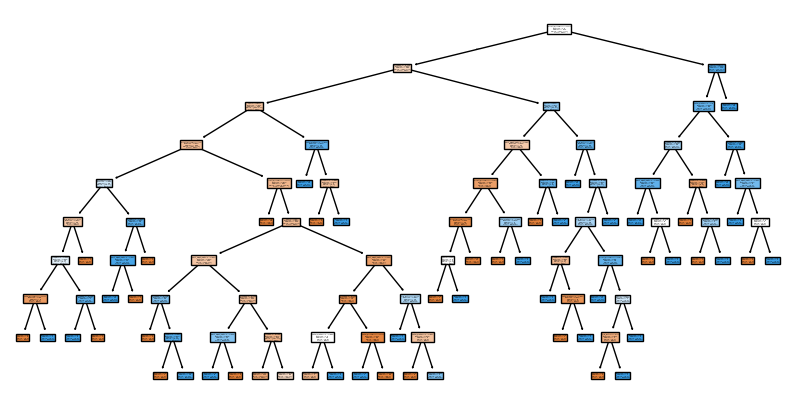

In [516]:
from sklearn.tree import plot_tree

best_model = grid_search_dt.best_estimator_
plt.figure(figsize=(10, 5))
plot_tree(best_model, feature_names=x.columns, class_names=["Sano", "Enfermo"], filled=True)
plt.show()

In [517]:
# Guardar mejores parámetros en best_params_dt y construir el modelo con estos parámetros
best_params_dt = grid_search_dt.best_params_
improved_model_dt = DecisionTreeClassifier(**best_params_dt, random_state=42)

In [518]:
trainScores, testScores = validation_curve(improved_model_dt, x_train_resampled, y_train_resampled, param_name="max_depth", param_range=np.arange(1,11), cv=subconjunto, scoring="f1")

In [519]:
trainScores.mean(axis=1)

array([0.55516247, 0.69304576, 0.72661743, 0.73973732, 0.77574704,
       0.79960022, 0.84528362, 0.87180817, 0.9048547 , 0.91965758])

In [520]:
testScores.mean(axis=1)

array([0.51893551, 0.64033278, 0.64501173, 0.61750729, 0.59588293,
       0.59457773, 0.63687608, 0.63103529, 0.66979625, 0.65426528])

In [521]:
improved_model_dt.fit(x_train_resampled, y_train_resampled)

DecisionTreeClassifier(criterion='entropy', max_depth=9, random_state=42)

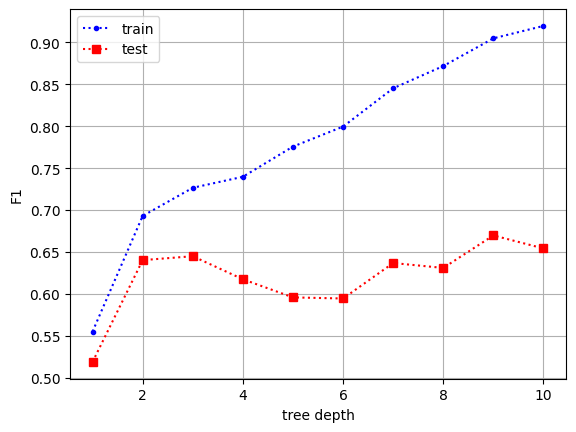

In [522]:
plt.plot(range(1,11),trainScores.mean(axis=1), '.:b', label="train")
plt.plot(range(1,11),testScores.mean(axis=1), 's:r', label="test")
plt.ylabel("F1")
plt.xlabel("tree depth")
plt.grid()
plt.legend()
plt.show()

# KNN

In [523]:
model_knn = KNeighborsClassifier()

In [524]:
# Buscar los mejores parámetros para el árbol de decisión
param_grid_knn =  {
    'n_neighbors': range(3, 22, 2),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']}

grid_search_knn = GridSearchCV(estimator=model_knn, param_grid=param_grid_knn, scoring='f1', cv=subconjunto)
grid_search_knn.fit(x_train_resampled, y_train_resampled)
print("Mejores parámetros", grid_search_knn.best_params_)

Mejores parámetros {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}


In [525]:
# Guardar mejores parámetros en best_params_dt y construir el modelo con estos parámetros
best_params_knn = grid_search_knn.best_params_
improved_model_knn = KNeighborsClassifier(**best_params_knn)

In [526]:
trainScores, testScores = validation_curve(improved_model_knn, x_train_resampled, y_train_resampled, param_name='n_neighbors', param_range=range(3,20,2), cv=subconjunto, scoring="f1")

In [527]:
trainScores.mean(axis=1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [528]:
testScores.mean(axis=1)

array([0.67746243, 0.65607645, 0.64430252, 0.64617794, 0.63906053,
       0.62220506, 0.61511833, 0.61720347, 0.61903401])

In [529]:
improved_model_knn.fit(x_train_resampled, y_train_resampled)

KNeighborsClassifier(metric='euclidean', n_neighbors=3, weights='distance')

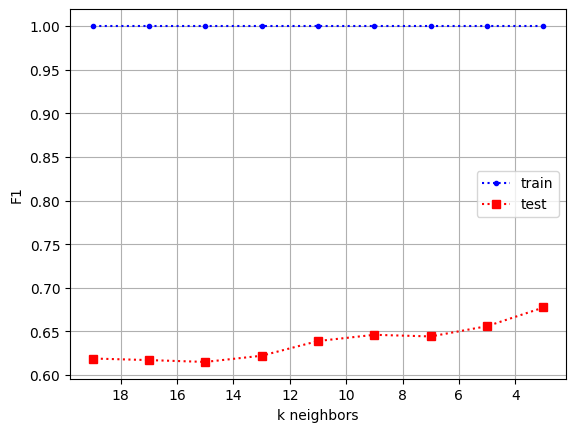

In [530]:
plt.plot(range(3,20,2),trainScores.mean(axis=1), '.:b', label="train")
plt.plot(range(3,20,2),testScores.mean(axis=1), 's:r', label="test")
plt.xlabel("k neighbors")
plt.ylabel("F1")
plt.gca().invert_xaxis()
plt.grid()
plt.legend()
plt.show()

# Logistic Regression

In [531]:
model = LogisticRegression(max_iter=1000)

In [532]:
param_grid_logreg = {'C': np.logspace(-2, 3, 11)}

grid_search_logreg = GridSearchCV(estimator=model, param_grid=param_grid_logreg, scoring='f1', cv=subconjunto)
grid_search_logreg.fit(x_train_resampled, y_train_resampled)
best_params_logreg = grid_search_logreg.best_params_
print("Mejores parámetros para Regresión Logística:", best_params_logreg)

Mejores parámetros para Regresión Logística: {'C': np.float64(0.03162277660168379)}


In [533]:
# Guardar mejores parámetros en best_params_dt y construir el modelo con estos parámetros
best_params_reg = grid_search_logreg.best_params_
improved_model_reg = LogisticRegression(**best_params_reg)

In [534]:
trainScores, testScores = validation_curve(improved_model_reg, x_train_resampled, y_train_resampled, param_name='C', param_range=np.logspace(-3,5,10), cv=subconjunto, scoring="f1")

In [535]:
trainScores.mean(axis=1)

array([0.63344765, 0.63678533, 0.64379262, 0.64594004, 0.63699726,
       0.64520187, 0.64507325, 0.64587346, 0.6455529 , 0.6471566 ])

In [536]:
testScores.mean(axis=1)

array([0.61798818, 0.61834421, 0.60937692, 0.607325  , 0.60260724,
       0.60601671, 0.61214947, 0.60429582, 0.60280103, 0.60297908])

In [537]:
improved_model_reg.fit(x_train_resampled, y_train_resampled)

LogisticRegression(C=np.float64(0.03162277660168379))

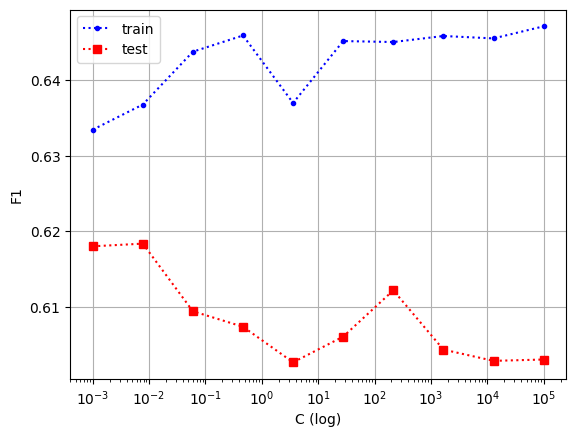

In [538]:
plt.plot(np.logspace(-3,5,10),trainScores.mean(axis=1), '.:b', label="train")
plt.plot(np.logspace(-3,5,10),testScores.mean(axis=1), 's:r', label="test")
plt.xscale("log")
plt.xlabel("C (log)")
plt.ylabel("F1")
plt.grid()
plt.legend()
plt.show()

# Final Comparison

In [539]:
from sklearn.metrics import f1_score

In [540]:
models = {
    "Logistic Regression": improved_model_reg,
    "KNN": improved_model_knn,
    "Decision Tree": improved_model_dt}

res = {}

for name, model in models.items():
    y_pred = model.predict(x_test_scaled)
    res[name] = {"F1 Score": f1_score(y_test, y_pred)}
    print(y_pred)

[0 0 1 0 1 0 0 0 0 1 1 0 0 0 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 0 1 0 0 1 1 0 1
 1 1 1 0 0 1 1 0 1 0 0 0 1 1 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 1 1 1 1 1 1 0
 1 1 0 0 0 1 1 1 0 1 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 0
 1 1 0 0 0 0 1 0 0 1 0 1 0 1 0 1 1 1 1 0 1 0 1 1 1 1 0 1 0 0 1 1 0 0 0]
[1 0 1 0 1 1 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 1 1 1 0 1 1 1 0 1 0 1 1 0 0 1
 1 0 1 0 0 1 1 0 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 0 1 1 1
 1 0 1 0 0 1 0 1 1 1 1 1 0 0 0 1 1 0 0 1 1 0 1 0 0 1 1 1 1 0 0 1 1 1 1 1 0
 0 1 1 1 1 1 1 0 1 0 0 1 0 1 0 0 1 1 1 0 1 0 1 1 1 1 0 1 0 0 1 1 0 1 1]
[0 0 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1
 0 1 1 1 0 1 1 1 1 0 0 0 1 1 1 0 1 1 0 0 0 0 0 1 1 1 1 1 0 1 1 1 1 0 1 0 1
 1 0 0 1 0 1 0 1 1 1 1 1 0 1 1 0 1 0 1 1 0 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 0
 1 1 0 1 0 0 1 0 0 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 0 1 0 1]


In [541]:
res_df = pd.DataFrame(res).T
res_df

,F1 Score
Logistic Regression,0.681081
KNN,0.724490
Decision Tree,0.746269


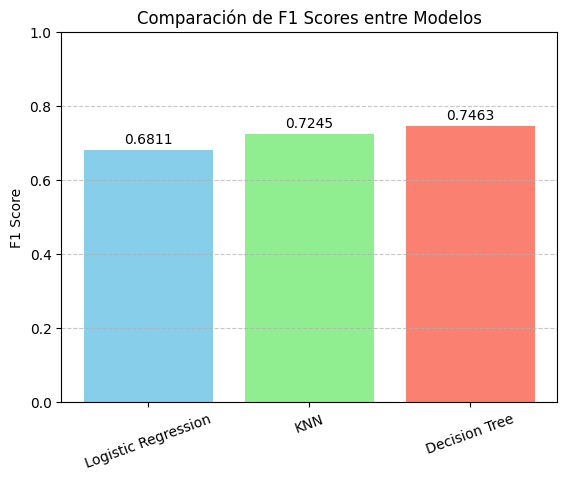

In [543]:
modelos = ['Logistic Regression', 'KNN', 'Decision Tree']
f1_scores = [0.681081, 0.724490, 0.746269]

bars = plt.bar(modelos, f1_scores, color=['skyblue', 'lightgreen', 'salmon'])
plt.ylim(0, 1)
plt.ylabel('F1 Score')
plt.title('Comparación de F1 Scores entre Modelos')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.01, f'{yval:.4f}', ha='center', va='bottom')

plt.xticks(rotation=20)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# Conclusion

Durante este análisis, el  objetivo fue construir modelos que pudieran predecir si un paciente tiene una enfermedad hepática. Al explorar los datos, vimos que había un desbalance importante entre las clases, había muchos más pacientes enfermos que sanos. Este tipo de desbalance hacía que los modelos se enfocaran solo en predecir la clase mayoritaria (enfermos), lo que a veces generaba accuracy alta pero en realidad no estába prediciendo los casos sanos.

Para solucionar eso, decidimos aplicar SMOTE, una técnica que genera ejemplos sintéticos de la clase minoritaria. Esto ayudó a balancear las clases en el conjunto de entrenamiento, dándole al modelo más información para aprender sobre los pacientes sanos. Primero dividimos los datos (con train_test_split) y después aplicamos SMOTE solo al entrenamiento, para evitar data leakage.

Además, usamos escalado Min-Max antes de entrenar los modelos, lo cual fue clave más para algoritmos como KNN y Regresión Logística que son sensibles a la escala de los datos.

También aplicamos GridSearchCV con validación cruzada estratificada, lo que nos permitió encontrar los mejores hiperparámetros y entrenamos tres modelos: Regresión Logística, KNN y Árbol de Decisión, y todos lograron un F1 Score de 0.8549.

Elegimos el F1 Score como métrica principal porque es más confiable en contextos con clases desbalanceadas. A diferencia de la precisión o el recall por separado, el F1 Score combina ambas.

Decision Tree obtuvo el mejor desempeño (0.7463) seguido de KNN (0.7245) y finalmente Logistic Regression (0.6811).